In [1]:
# Auto-reload
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

# Setting a random seed for reproducibility
rs = np.random.RandomState(seed=123)

# Generating a random array
X = rs.uniform(low=0.0, high=1.0, size=(3, 5))  # a 3 x 5 array

print(X)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
 [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
 [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]]


In [3]:
# Accessing elements

# get a single element 
print(X[0, 0])
print(X[1, 1])

# get a row 
print(X[1])

# get a column
print(X[:, 1])

# Indexing by an array of integers
indices = np.array([3, 1, 0])
print(X[:, indices])

0.6964691855978616
0.9807641983846155
[0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
[0.28613933 0.9807642  0.72904971]
[[0.55131477 0.28613933 0.69646919]
 [0.4809319  0.9807642  0.42310646]
 [0.0596779  0.72904971 0.34317802]]


In [4]:
# Getting the shape and reshaping an array

# Generating a random array
rnd = np.random.RandomState(seed=123)
X = rnd.uniform(low=0.0, high=1.0, size=(2, 3))  # a 3 x 5 array

print(X.shape)
print(X)
print('Reshaping')
print(X.reshape(3, 2))
print('Transposing')
print(X.T)

(2, 3)
[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]]
Reshaping
[[0.69646919 0.28613933]
 [0.22685145 0.55131477]
 [0.71946897 0.42310646]]
Transposing
[[0.69646919 0.55131477]
 [0.28613933 0.71946897]
 [0.22685145 0.42310646]]


In [5]:
# Creating a row vector
# of evenly spaced numbers over a specified interval.

y = np.linspace(0, 12, 5)
print(y)

[ 0.  3.  6.  9. 12.]


Text(0, 0.5, 'feature 2')

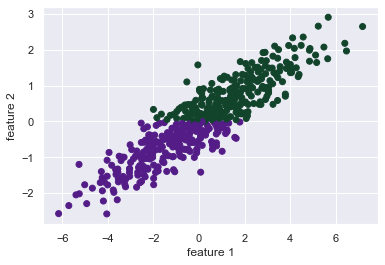

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
sns.set()

# construct cmap
my_cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7, as_cmap=True)

rs = np.random.RandomState(123)
X = rs.multivariate_normal(mean=np.zeros(2), cov=np.array([[5, 2], [2, 1]]), size=500)
y = X[:, 1] < 0

df = pd.DataFrame(X,columns = ["x","y"])
df["val"] = pd.Series(y)
plt.scatter(x=df["x"],y=df["y"],c=df["val"],cmap=my_cmap)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


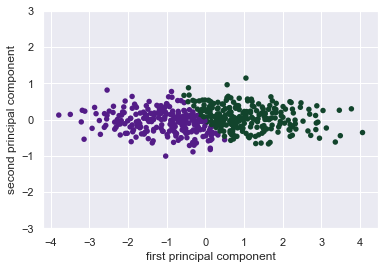

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_std = StandardScaler().fit_transform(X)
pca.fit(X_std)
print(pca.components_)
X_pca = pca.transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30,cmap=my_cmap)
plt.ylim(-3, 3)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [8]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
print(X[:5])
print(names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']


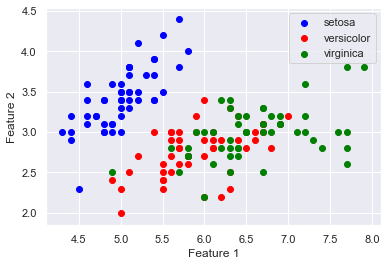

In [9]:
# Visualization with the first two features
for i, col in enumerate(('blue', 'red', 'green')):
    plt.scatter(X[y==i, 0], X[y==i, 1], label=names[i], c=col)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')

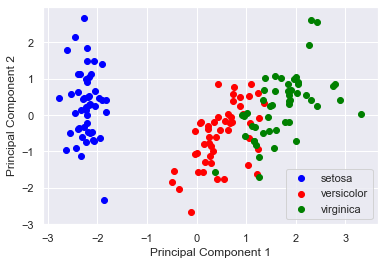

In [10]:
# Visualization with the first two principal components
pca = PCA(n_components=2)
X_std = StandardScaler().fit_transform(X)
X_pca = pca.fit_transform(X_std)

for i, col in enumerate(('blue', 'red', 'green')):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], label=names[i], c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')

In [11]:
from mnist import MNIST

def load_training():
    mndata = MNIST('./data')
    mndata.gz = True
    X_train, labels_train = map(np.array, mndata.load_training())
    X_train = X_train / 255.0
    return(X_train, labels_train)

X, y0 = load_training()
print(X.shape)

(60000, 784)


In [12]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()
X_std = StandardScaler().fit_transform(X)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

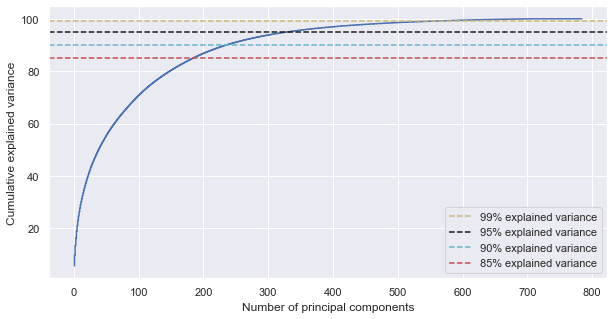

In [13]:
var_exp = pca.explained_variance_
cum_var_prop = np.cumsum(var_exp) / np.sum(var_exp) * 100

plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_prop)
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of principal components')
plt.axhline(y = 99, color='y', linestyle='--', label = '99% explained variance')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% explained variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% explained variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% explained variance')
plt.legend(loc='best')

In [14]:
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
num_components = [np.argmax(cum_var_prop > 99) + 1, np.argmax(cum_var_prop > 95) + 1,
                      np.argmax(cum_var_prop > 90) + 1, np.argmax(cum_var_prop >= 85) + 1]
print(num_components)

[543, 331, 236, 185]


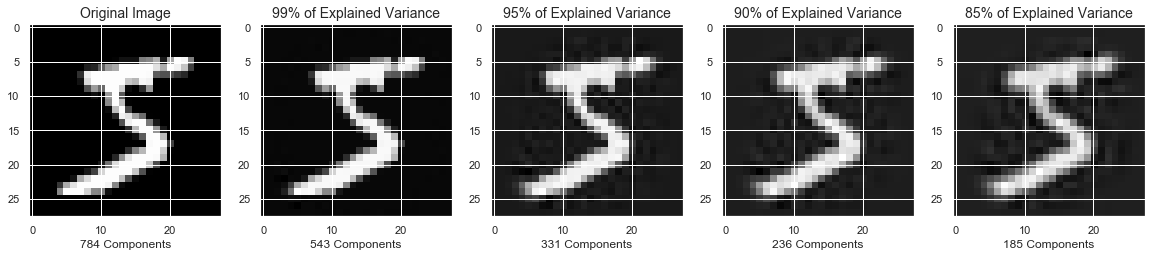

In [15]:
def plot_approximation(num, percent, images): 
    pca = PCA(n_components=num)
    pca.fit(images)
    components = pca.transform(images)
    approx = pca.inverse_transform(components)

    plt.imshow(approx[0].reshape(28, 28), cmap = 'gray')
    plt.xlabel(str(num) + ' Components', fontsize = 12)
    plt.title(str(percent) + '% of Explained Variance', fontsize = 14)


five_plot = plt.figure(figsize=(20,4))

plt.subplot(1, 5, 1)
plt.imshow(X[0].reshape(28,28), cmap = 'gray')
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14)

for i, (num, percent) in enumerate(zip(num_components, [99, 95, 90, 85])):
    plt.subplot(1, 5, i+2)
    plot_approximation(num, percent, X)

In [16]:
X1 = rs.normal(size=(100, 2))
X2 = rs.normal(3, 1, size=(100, 2))
X3 = rs.normal(6, 1, size=(100, 2))
y = np.repeat([0, 1, 2], 100)
X = np.concatenate((X1, X2, X3))

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=11719)
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


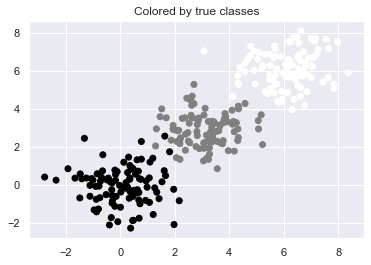

Text(0.5, 1.0, 'Colored by clusters of k-means')

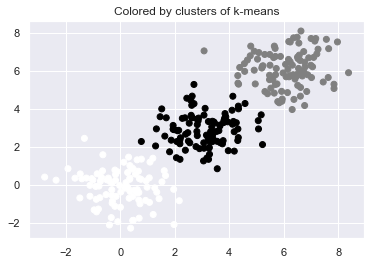

In [18]:
my_cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)

plt.scatter(X[:, 0], X[:, 1], c=y,cmap='gray')
plt.title('Colored by true classes')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=labels,cmap='gray')
plt.title('Colored by clusters of k-means')

In [19]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, labels))

[[  3   0  97]
 [100   0   0]
 [  1  99   0]]


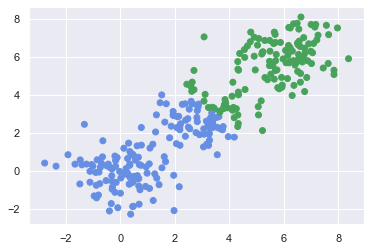

In [20]:
kmeans = KMeans(n_clusters=2, random_state=11719)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,cmap=my_cmap)

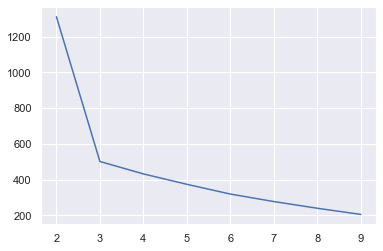

In [21]:
krange = range(2, 10)
obj = np.zeros(len(krange))
for k in krange:
    kmeans = KMeans(n_clusters=k, random_state=1172019).fit(X)
    obj[k-2] = kmeans.inertia_
plt.plot(krange, obj)

Text(0.5, 1.0, 'Colored by true classes')

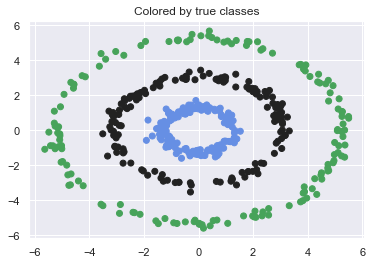

In [22]:
def move_outward(x, r):
    new_x = x + x / np.sqrt(np.sum(x**2, 1))[:, np.newaxis] * r
    return new_x

X1 = move_outward(rs.normal(scale=0.25, size=(150, 2)), 1)
X2 = move_outward(rs.normal(scale=0.25, size=(150, 2)), 2.8)
X3 = move_outward(rs.normal(scale=0.25, size=(150, 2)), 5)
y = np.repeat([0, 1, 2], 150)
X = np.concatenate((X1, X2, X3))

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=my_cmap)
plt.title('Colored by true classes')

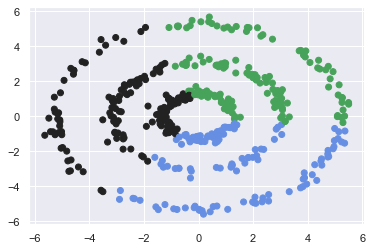

In [23]:
kmeans = KMeans(n_clusters=3, random_state=11719)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,cmap=my_cmap)

In [24]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3, random_state=11719,
                                affinity='nearest_neighbors', n_neighbors=10)
clustering.fit(X)
labels = clustering.labels_

C:\Users\CGLaa\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


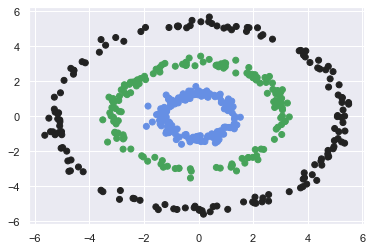

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=labels,cmap=my_cmap)

In [26]:
X1 = rs.normal((5.0/(2**0.5),5.0/(2**0.5)),1,size=(100, 2))
rs.normal()
X2 = rs.normal((5,0), 1, size=(100, 2))
X3 = rs.normal((0,5), 1, size=(100, 2))
y = np.repeat([0, 1, 2], 100)
X = np.concatenate((X1, X2, X3))

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=11719)
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1]


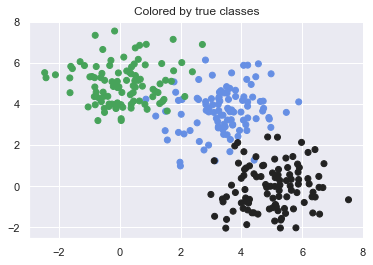

Text(0.5, 1.0, 'Colored by clusters of k-means')

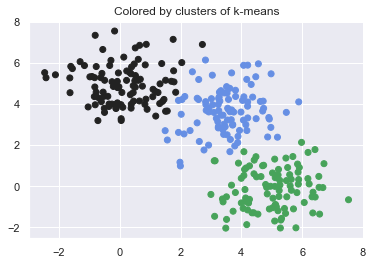

In [28]:
my_cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=my_cmap)
plt.title('Colored by true classes')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=labels,cmap=my_cmap)
plt.title('Colored by clusters of k-means')

In [29]:
from sklearn.neural_network import MLPClassifier

def load_testing():
    mndata = MNIST('./data')
    mndata.gz = True
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_test = X_test / 255.0
    return X_test, labels_test

X_train, y_train = load_training()
X_test, y_test = load_testing()

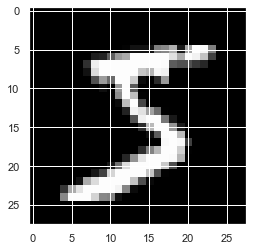

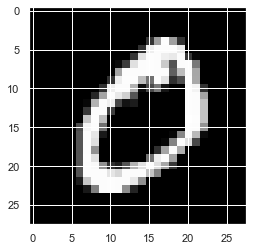

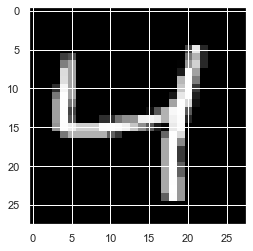

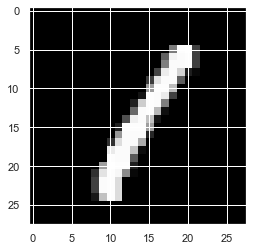

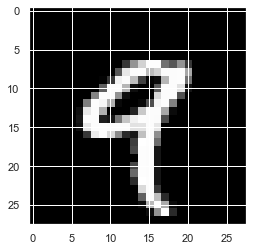

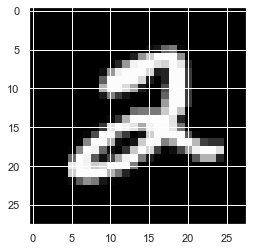

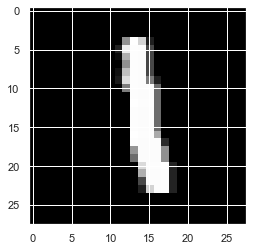

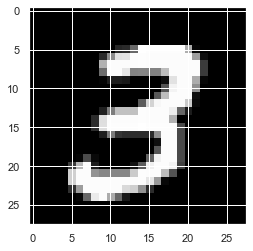

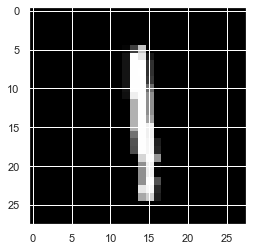

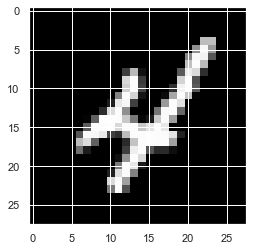

In [30]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.show()
# X_train[0]

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, solver='sgd', verbose=10, tol=1e-4, random_state=11719,
                    learning_rate_init=0.05)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.37217563
Iteration 2, loss = 0.18783110
Iteration 3, loss = 0.14296818
Iteration 4, loss = 0.11733725
Iteration 5, loss = 0.10016438
Iteration 6, loss = 0.08850300
Iteration 7, loss = 0.07903283
Iteration 8, loss = 0.07104032
Iteration 9, loss = 0.06470313
Iteration 10, loss = 0.05966878


C:\Users\CGLaa\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.984717
Test set score: 0.971100


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLPNet(nn.Module):
    
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = MLPNet()

In [33]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

batch_size = 100
batch_num = int(len(X_train) / batch_size)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [34]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(batch_num):
        # get the inputs
        inputs = torch.from_numpy(X_train[(i*batch_size):((i+1)*batch_size)]).float()
        labels = torch.from_numpy(y_train[(i*batch_size):((i+1)*batch_size)]).long()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print statistics
    print(f'Iteration {epoch+1}, loss = {running_loss / batch_num}')

print('Finished Training')

Iteration 1, loss = 0.6485924861331781
Iteration 2, loss = 0.23996205225897332
Iteration 3, loss = 0.1685180520763
Iteration 4, loss = 0.12850680087227373
Iteration 5, loss = 0.10204131761721025
Iteration 6, loss = 0.08323614351451397
Iteration 7, loss = 0.06896870821869622
Iteration 8, loss = 0.05788248574982087
Iteration 9, loss = 0.04887710014008917
Iteration 10, loss = 0.041611213845317255
Finished Training


In [35]:
with torch.no_grad():
    #for i in range(len(X_test)):
    images = torch.from_numpy(X_test).float()
    labels = torch.from_numpy(y_test).long()

    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

Accuracy of the network on the 10000 test images: 97.59%
